In [1]:
import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp


In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2


- imagine a study where there are 2 IVs that each have 2 levels (groups/categories) and a continuous DV (outcome). 

- We have independent variable A with 2 levels (A1 and A2), independent variable B with 2 levels (B1 and B2) and our DV which is most commonly annotated as Y. 

- We want to see the effects of A on Y, B on Y, and to test if there is an interaction effect of A and B on Y. 

- With this design, the following hypotheses are being tested:

    Factor A x Factor B interactions:
        H0 : there is not interaction
        Ha : there is an interaction

    Main effect of factor A:
        H0 : ?1 = ?2
        Ha : Not all of the means (?) are equal

    Main effect of factor B:
        H0 : ?1 = ?2
        Ha : Not all of the means (?) are equal

In [5]:
df = pandas.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [6]:
df.shape

(20, 3)

In [7]:
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [8]:
rp.summary_cont(df['Yield'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Yield,20.0,29.04,4.230516,0.945972,27.060058,31.019942


In [9]:
df['Yield'].describe()

count    20.000000
mean     29.040000
std       4.230516
min      19.400000
25%      26.400000
50%      29.600000
75%      32.400000
max      35.200000
Name: Yield, dtype: float64

In [22]:
groups = df.groupby(['Fert'])['Yield']
groups.groups

{'A': Int64Index([0, 1, 2, 3, 4, 10, 11, 12, 13, 14], dtype='int64'),
 'B': Int64Index([5, 6, 7, 8, 9, 15, 16, 17, 18, 19], dtype='int64')}

In [10]:
rp.summary_cont(df.groupby(['Fert']))['Yield']

AttributeError: 'function' object has no attribute 'DataFrameGroupBy'

In [20]:
data['Borough'].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

Creating New Columns
There is no total score column, so we'll have to create it. In addition, we'll have to find the mean score of the each district across all schools.

In [21]:
data['total_score'] = data['Average Score (SAT Reading)'] +  \
                      data['Average Score (SAT Math)']    +  \
                      data['Average Score (SAT Writing)']
        
data = data[['Borough', 'total_score']].dropna()   

data.head()

,Borough,total_score
2,Manhattan,1859.0
3,Manhattan,1193.0
4,Manhattan,1261.0
5,Manhattan,1529.0
6,Manhattan,1197.0


In [26]:
data[data['Borough'] == 'Bronx']['total_score']

117    1164.0
118    1227.0
119    1202.0
120    1100.0
121    1203.0
122    1142.0
123    1124.0
124    1134.0
126    1053.0
128    1227.0
129     995.0
131    1349.0
133    1290.0
134    1119.0
135    1160.0
136    1005.0
138    1130.0
139    1466.0
140    1246.0
141    1188.0
142    1138.0
143    1145.0
144    1182.0
145    1159.0
147    1285.0
148    1178.0
149    1214.0
152    1121.0
153    1141.0
154    1278.0
        ...  
200    1224.0
201    1242.0
202    1102.0
203    2041.0
204     987.0
205    1223.0
207    1276.0
208    2013.0
209    1314.0
210    1156.0
212    1248.0
213    1278.0
214    1016.0
215    1407.0
216    1286.0
217     924.0
218    1327.0
219    1066.0
220    1266.0
221    1294.0
222    1062.0
223    1204.0
224    1115.0
225    1251.0
227    1161.0
228    1165.0
230    1210.0
231    1273.0
232    1255.0
233    1192.0
Name: total_score, Length: 98, dtype: float64

In [27]:
x = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']

district_dict = {}

# Assigns each test score series to a dictionary key
for district in x:
    district_dict[district] = data[data['Borough'] == district]['total_score']


Brooklyn_std : 154.8684270520867
Bronx_std : 150.39390071890668
Manhattan_std : 230.2941395363782
Queens_std : 195.25289850192115
Staten Island_std : 222.30359621222706


Text(0,0.5,'Average Total SAT Score')

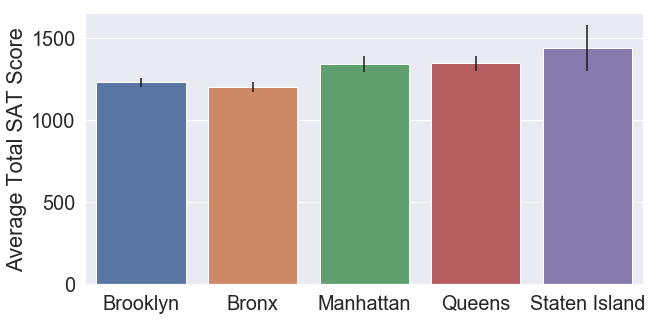

In [28]:
y = []
yerror = []

# Assigns the mean score and 95% confidence limit to each district
for district in x:
    y.append(district_dict[district].mean())
    
    yerror.append(1.96 * district_dict[district].std()/np.sqrt(district_dict[district].shape[0]))    
    
    print(district + '_std : {}'.format(district_dict[district].std()))
    
sns.set(font_scale=1.8)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x, y, yerr=yerror)
ax.set_ylabel('Average Total SAT Score')

- average SAT scores are quite different for each district. 
- We are interested in knowing if this is caused by random variation in data, or if there is an underlying cause. 
- Since we have 5 different groups, we cannot use the t-test. 
- Also note that the standard deviation of each group are also very different, so we've violated one of our assumpions. 
- we are going to use the 1-way ANOVA test

__The Null hypothesis:-__
There are no significant differences between the groups' mean SAT scores.
$ H_0 : μ1=μ2=μ3=μ4=μ5$ 


__and Alternative Hypothesis :-__
There is a significant difference between the groups' mean SAT scores.
$H_A : μi≠μj$

Where μi and μj can be the mean of any group. 

If there is at least one group with a significant difference with another group, the null hypothesis will be rejected.

#### 1-way ANOVA
Similar to the t-test, we can calculate a score for the ANOVA. Then we can look up the score in the F-distribution and obtain a p-value.

_This is quite a lot of math, fortunately scipy has a function that plugs in all the values for us._ 

In [32]:
stats.f_oneway(
             district_dict['Brooklyn'], district_dict['Bronx'], \
             district_dict['Manhattan'], district_dict['Queens'], \
             district_dict['Staten Island']
)

F_onewayResult(statistic=12.733085029201668, pvalue=1.0161974965566023e-09)

The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between the SAT scores for each district. 